In [327]:
import pandas as pd
import numpy as np
import itertools

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.cluster import KMeans

pd.set_option('display.float_format','{:,.5f}'.format)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
from IPython import display

%matplotlib inline

In [328]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [329]:
description = pd.read_excel('data_set.xls')

In [330]:
description

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,TARGET,целевая переменная:отклик на маркетинговую кам...
2,AGE,возраст клиента
3,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
4,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
5,GENDER,пол клиента
6,CHILD_TOTAL,количество детей клиента
7,DEPENDANTS,количество иждивенцев клиента
8,EDUCATION,образование
9,MARITAL_STATUS,семейное положение


In [331]:
df = pd.read_excel('data_set.xls', sheet_name='данные')

In [332]:
df.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR,FAMILY_INCOME,PERSONAL_INCOME,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE,REGION_NM,REG_FACT_FL,FACT_POST_FL,REG_POST_FL,REG_FACT_POST_FL,REG_FACT_POST_TP_FL,FL_PRESENCE_FL,OWN_AUTO,AUTO_RUS_FL,HS_PRESENCE_FL,COT_PRESENCE_FL,GAR_PRESENCE_FL,LAND_PRESENCE_FL,CREDIT,TERM,FST_PAYMENT,DL_DOCUMENT_FL,GPF_DOCUMENT_FL,FACT_LIVING_TERM,WORK_TIME,FACT_PHONE_FL,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,Торговля,Рабочий,Частная компания,Без участия,Вспомогательный техперсонал,от 10000 до 20000 руб.,"5,000.00000",Оренбургская область,Оренбургская область,Оренбургская область,Оренбургская область,ПОВОЛЖСКИЙ,1,1,1,1,1,0,0,0,0,0,0,0,"8,000.00000",6,"8,650.00000",0,1,220,18.00000,0,0,1,1,1,6,2,1,"1,580.00000","1,580.00000",nan
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,Торговля,Рабочий,Индивидуальный предприниматель,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,"12,000.00000",Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,Ставропольский край,ЮЖНЫЙ,1,1,1,1,0,0,0,0,0,0,0,0,"21,650.00000",6,"4,000.00000",0,1,137,97.00000,1,0,1,1,1,6,1,1,"4,020.00000","4,020.00000",nan
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,Информационные технологии,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,"9,000.00000",Иркутская область,Иркутская область,Иркутская область,Иркутская область,ВОСТОЧНО-СИБИРСКИЙ,1,1,1,1,1,0,0,0,1,0,0,0,"33,126.00000",12,"4,000.00000",0,1,251,84.00000,0,0,1,2,1,11,0,0,0.00000,0.00000,nan
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,Образование,Руководитель среднего звена,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 20000 до 50000 руб.,"25,000.00000",Ростовская область,Ростовская область,Ростовская область,Ростовская область,ЮЖНЫЙ,0,1,0,0,1,1,0,0,0,0,0,0,"8,491.82000",6,"5,000.00000",0,0,36,168.00000,1,1,1,1,1,6,3,1,"1,589.92333","1,590.00000",nan
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,Государственная служба,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,"12,000.00000",Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,Ставропольский край,ЮЖНЫЙ,1,1,1,1,0,0,0,0,1,0,0,0,"21,990.00000",12,"4,000.00000",0,1,83,101.00000,1,0,1,2,1,16,2,1,"1,152.15000","2,230.00000",nan


In [333]:
df.sort_values('AGREEMENT_RK')

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR,FAMILY_INCOME,PERSONAL_INCOME,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE,REGION_NM,REG_FACT_FL,FACT_POST_FL,REG_POST_FL,REG_FACT_POST_FL,REG_FACT_POST_TP_FL,FL_PRESENCE_FL,OWN_AUTO,AUTO_RUS_FL,HS_PRESENCE_FL,COT_PRESENCE_FL,GAR_PRESENCE_FL,LAND_PRESENCE_FL,CREDIT,TERM,FST_PAYMENT,DL_DOCUMENT_FL,GPF_DOCUMENT_FL,FACT_LIVING_TERM,WORK_TIME,FACT_PHONE_FL,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,Торговля,Рабочий,Частная компания,Без участия,Вспомогательный техперсонал,от 10000 до 20000 руб.,"5,000.00000",Оренбургская область,Оренбургская область,Оренбургская область,Оренбургская область,ПОВОЛЖСКИЙ,1,1,1,1,1,0,0,0,0,0,0,0,"8,000.00000",6,"8,650.00000",0,1,220,18.00000,0,0,1,1,1,6,2,1,"1,580.00000","1,580.00000",nan
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,Торговля,Рабочий,Индивидуальный предприниматель,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,"12,000.00000",Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,Ставропольский край,ЮЖНЫЙ,1,1,1,1,0,0,0,0,0,0,0,0,"21,650.00000",6,"4,000.00000",0,1,137,97.00000,1,0,1,1,1,6,1,1,"4,020.00000","4,020.00000",nan
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,Информационные технологии,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,"9,000.00000",Иркутская область,Иркутская область,Иркутская область,Иркутская область,ВОСТОЧНО-СИБИРСКИЙ,1,1,1,1,1,0,0,0,1,0,0,0,"33,126.00000",12,"4,000.00000",0,1,251,84.00000,0,0,1,2,1,11,0,0,0.00000,0.00000,nan
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,Образование,Руководитель среднего звена,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 20000 до 50000 руб.,"25,000.00000",Ростовская область,Ростовская область,Ростовская область,Ростовская область,ЮЖНЫЙ,0,1,0,0,1,1,0,0,0,0,0,0,"8,491.82000",6,"5,000.00000",0,0,36,168.00000,1,1,1,1,1,6,3,1,"1,589.92333","1,590.00000",nan
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,Государственная служба,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,"12,000.00000",Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,Ставропольский край,ЮЖНЫЙ,1,1,1,1,0,0,0,0,1,0,0,0,"21,990.00000",12,"4,000.00000",0,1,83,101.00000,1,0,1,2,1,16,2,1,"1,152.15000","2,230.00000",nan
5,59911784,0,29,1,0,0,0,0,Среднее,Гражданский брак,Торговля,Специалист,Частная компания,Без участия,Адм-хоз. и трансп. службы,от 20000 до 50000 руб.,"12,000.00000",Белгородская область,Белгородская область,Белгородская область,Белгородская область,ЦЕНТРАЛЬНЫЙ 1,1,1,1,1,1,0,1,0,0,0,0,0,"30,615.00000",12,"3,500.00000",0,0,108,40.00000,1,0,1,2,1,11,0,0,0.00000,0.00000,nan
6,59911832,0,35,1,0,0,1,1,Высшее,Разведен(а),Другие сферы,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 20000 до 50000 руб.,"15,000.00000",Вологодская область,Вологодская область,Вологодская область,Вологодская область,ЦЕНТРАЛЬНЫЙ 2,1,1,1,1,1,1,0,0,0,0,0,0,"10,450.00000",3,"15,000.00000",0,1,48,6.00000,0,0,1,2,2,14,0,0,0.00000,0.00000,nan
7,59912034,0,41,1,0,1,0,0,Среднее,Состою в браке,Сельское хозяйство,Рабочий,Частная компания,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,"6,000.00000",Волгоградская область,Волгоградская область,Волгоградская область,Волгоградская область,ЮЖНЫЙ,1,1,1,1,1,1,0,0,0,0,0,0,"15,035.00000",10,465.00000,0,1,204,6.00000,1,1,1,2,1,11,0,0,0.00000,0.00000,nan
8,59912560,0,53,1,0,0,2,0,Высшее,Состою в браке,Здравоохранение,Руководитель высшего звена,Частная компания,Без участия,Участие в основ. деятельности,свыше 50000 руб.,"100,000.00000",Яросла

In [334]:
len(set(df.AGREEMENT_RK))

15223

In [335]:
df.drop('AGREEMENT_RK', axis=1, inplace=True)

In [336]:
df.shape

(15223, 51)

In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 51 columns):
TARGET                        15223 non-null int64
AGE                           15223 non-null int64
SOCSTATUS_WORK_FL             15223 non-null int64
SOCSTATUS_PENS_FL             15223 non-null int64
GENDER                        15223 non-null int64
CHILD_TOTAL                   15223 non-null int64
DEPENDANTS                    15223 non-null int64
EDUCATION                     15223 non-null object
MARITAL_STATUS                15223 non-null object
GEN_INDUSTRY                  13856 non-null object
GEN_TITLE                     13856 non-null object
ORG_TP_STATE                  13856 non-null object
ORG_TP_FCAPITAL               13858 non-null object
JOB_DIR                       13856 non-null object
FAMILY_INCOME                 15223 non-null object
PERSONAL_INCOME               15223 non-null float64
REG_ADDRESS_PROVINCE          15223 non-null object
FACT_ADDRESS_

In [338]:
df['TARGET'].value_counts()

0    13411
1     1812
Name: TARGET, dtype: int64

In [339]:
y = df['TARGET']
df.drop('TARGET', axis=1, inplace=True)

## Бинарные признаки

In [340]:
binary = [col for col in df.columns if (len(df[col].unique()) == 2)&(df[col].dtype != 'object')]

In [341]:
binary

['SOCSTATUS_WORK_FL',
 'SOCSTATUS_PENS_FL',
 'GENDER',
 'REG_FACT_FL',
 'FACT_POST_FL',
 'REG_POST_FL',
 'REG_FACT_POST_FL',
 'REG_FACT_POST_TP_FL',
 'FL_PRESENCE_FL',
 'AUTO_RUS_FL',
 'HS_PRESENCE_FL',
 'COT_PRESENCE_FL',
 'GAR_PRESENCE_FL',
 'LAND_PRESENCE_FL',
 'GPF_DOCUMENT_FL',
 'FACT_PHONE_FL',
 'REG_PHONE_FL',
 'GEN_PHONE_FL']

## Числовые признаки

In [342]:
linear = [col for col in df.columns if (df[col].dtype != 'object')&(col not in binary)]

In [343]:
df[linear] = df[linear].fillna(value=0)

In [344]:
scaler = StandardScaler()

In [345]:
scaler.fit(df[linear])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [346]:
df[linear] = scaler.transform(df[linear])

## Категориальные признаки

In [347]:
categories = [col for col in df.columns if df[col].dtype == 'object']

In [348]:
categories

['EDUCATION',
 'MARITAL_STATUS',
 'GEN_INDUSTRY',
 'GEN_TITLE',
 'ORG_TP_STATE',
 'ORG_TP_FCAPITAL',
 'JOB_DIR',
 'FAMILY_INCOME',
 'REG_ADDRESS_PROVINCE',
 'FACT_ADDRESS_PROVINCE',
 'POSTAL_ADDRESS_PROVINCE',
 'TP_PROVINCE',
 'REGION_NM']

In [349]:
df[categories] = df[categories].fillna('Unknown')

In [350]:
label_enc_cols = [col for col in categories if len(df[col].unique()) >= 10]
ohe_enc_cols = [col for col in categories if len(df[col].unique()) <= 10]

In [351]:
df[categories].head()

,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR,FAMILY_INCOME,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE,REGION_NM
0,Среднее специальное,Состою в браке,Торговля,Рабочий,Частная компания,Без участия,Вспомогательный техперсонал,от 10000 до 20000 руб.,Оренбургская область,Оренбургская область,Оренбургская область,Оренбургская область,ПОВОЛЖСКИЙ
1,Среднее,Состою в браке,Торговля,Рабочий,Индивидуальный предприниматель,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,Ставропольский край,ЮЖНЫЙ
2,Неполное среднее,Состою в браке,Информационные технологии,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,Иркутская область,Иркутская область,Иркутская область,Иркутская область,ВОСТОЧНО-СИБИРСКИЙ
3,Высшее,Состою в браке,Образование,Руководитель среднего звена,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 20000 до 50000 руб.,Ростовская область,Ростовская область,Ростовская область,Ростовская область,ЮЖНЫЙ
4,Среднее,Состою в браке,Государственная служба,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,Ставропольский край,ЮЖНЫЙ


In [352]:
d = {}
for col in label_enc_cols: #+ ohe_enc_cols:
    transformer = LabelEncoder()
    transformer.fit(df[col])
    d[col] = transformer
    
    df[col] = transformer.transform(df[col])

In [353]:
df[label_enc_cols].head()

,GEN_INDUSTRY,GEN_TITLE,JOB_DIR,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE,REGION_NM
0,24,7,3,46,46,45,41,4
1,24,7,9,19,19,18,55,11
2,5,12,9,18,18,17,17,1
3,14,10,9,52,52,51,47,11
4,2,12,9,19,19,18,55,11


In [354]:
# ohe = OneHotEncoder()

# ohe.fit(df[ohe_enc_cols])

# pd.concat([df, pd.DataFrame(ohe.transform(df[ohe_enc_cols]).todense())], axis=1)

# ohe.transform(df[ohe_enc_cols])

In [355]:
df = pd.get_dummies(df, columns=ohe_enc_cols, dummy_na=True, sparse=False)

In [356]:
df.head()

,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,GEN_INDUSTRY,GEN_TITLE,JOB_DIR,PERSONAL_INCOME,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE,REGION_NM,REG_FACT_FL,FACT_POST_FL,REG_POST_FL,REG_FACT_POST_FL,REG_FACT_POST_TP_FL,FL_PRESENCE_FL,OWN_AUTO,AUTO_RUS_FL,HS_PRESENCE_FL,COT_PRESENCE_FL,GAR_PRESENCE_FL,LAND_PRESENCE_FL,CREDIT,TERM,FST_PAYMENT,DL_DOCUMENT_FL,GPF_DOCUMENT_FL,FACT_LIVING_TERM,WORK_TIME,FACT_PHONE_FL,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,EDUCATION_Высшее,EDUCATION_Два и более высших образования,EDUCATION_Неоконченное высшее,EDUCATION_Неполное среднее,EDUCATION_Среднее,EDUCATION_Среднее специальное,EDUCATION_Ученая степень,EDUCATION_nan,MARITAL_STATUS_Вдовец/Вдова,MARITAL_STATUS_Гражданский брак,MARITAL_STATUS_Не состоял в браке,MARITAL_STATUS_Разведен(а),MARITAL_STATUS_Состою в браке,MARITAL_STATUS_nan,ORG_TP_STATE_Unknown,ORG_TP_STATE_Государственная комп./учреж.,ORG_TP_STATE_Индивидуальный предприниматель,ORG_TP_STATE_Некоммерческая организация,ORG_TP_STATE_Частная ком. с инос. капиталом,ORG_TP_STATE_Частная компания,ORG_TP_STATE_nan,ORG_TP_FCAPITAL_Unknown,ORG_TP_FCAPITAL_Без участия,ORG_TP_FCAPITAL_С участием,ORG_TP_FCAPITAL_nan,FAMILY_INCOME_до 5000 руб.,FAMILY_INCOME_от 10000 до 20000 руб.,FAMILY_INCOME_от 20000 до 50000 руб.,FAMILY_INCOME_от 5000 до 10000 руб.,FAMILY_INCOME_свыше 50000 руб.,FAMILY_INCOME_nan
0,0.74081,1,0,1,0.90479,0.43681,24,7,3,-0.98210,46,46,45,41,4,1,1,1,1,1,0,-0.36261,0,0,0,0,0,-0.54892,-0.51320,1.01813,0.00000,1,-0.01074,-0.01067,0,0,1,-0.48866,0.25101,-0.23581,2.63451,2.44539,1.61965,1.59912,-0.13839,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
1,-0.72462,1,0,1,1.90944,2.89919,24,7,9,-0.20564,19,19,18,55,11,1,1,1,1,0,0,-0.36261,0,0,0,0,0,0.57477,-0.51320,0.11660,0.00000,1,-0.01106,-0.00727,1,0,1,-0.48866,0.25101,-0.23581,1.17466,2.44539,4.56768,4.51752,-0.13839,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,0.99942,1,0,1,2.91408,-0.79437,5,12,9,-0.53841,18,18,17,17,1,1,1,1,1,1,0,-0.36261,0,1,0,0,0,1.51950,0.95237,0.11660,0.00000,1,-0.01062,-0.00783,0,0,1,0.77152,0.25101,0.39269,-0.28520,-0.36604,-0.28931,-0.29067,-0.13839,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,-0.12121,1,0,1,-0.09985,0.43681,14,10,9,1.23638,52,52,51,47,11,0,1,0,0,1,1,-0.36261,0,0,0,0,0,-0.50843,-0.51320,0.31048,0.00000,0,-0.01144,-0.00421,1,1,1,-0.48866,0.25101,-0.23581,4.09437,2.44539,1.63164,1.61108,-0.13839,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,-0.89702,1,0,0,-1.10449,-0.79437,2,12,9,-0.20564,19,19,18,55,11,1,1,1,1,0,0,-0.36261,0,1,0,0,0,0.60276,0.95237,0.11660,0.00000,1,-0.01126,-0.00710,1,0,1,0.77152,0.25101,1.02119,2.63451,2.44539,1.10272,2.37656,-0.13839,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [357]:
df.shape

(15223, 76)

## Метрические признаки

In [358]:
cluster_features = ['AGE', 'GENDER', 'PERSONAL_INCOME', 'TERM']

In [360]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(df[cluster_features])

In [361]:
kmeans.labels_

array([2, 3, 0, ..., 3, 0, 3])

In [362]:
kmeans.cluster_centers_

array([[ 0.7483363 ,  0.75075529, -0.29066424,  0.72618939],
       [-0.23098382,  0.36120631,  2.06806152, -0.14555382],
       [ 0.9235    ,  0.74892009, -0.29861944, -0.72396551],
       [-0.88522301,  0.61517572, -0.17365285, -0.18598512],
       [-0.03905241,  0.66734694,  0.28153091,  3.37655348]])

In [363]:
from sklearn.metrics import pairwise_distances

In [364]:
metric_features = pairwise_distances(df[cluster_features], kmeans.cluster_centers_)

In [365]:
metric_features.shape

(15223, 5)

In [366]:
cluster_features

['AGE', 'GENDER', 'PERSONAL_INCOME', 'TERM']

In [367]:
df = pd.concat([df, pd.DataFrame(metric_features, columns=["cluster_" + str(x) for x in range(1,6,1)])], axis=1)

## Разделение на train и test

In [368]:
df.shape

(15223, 81)

In [369]:
df.head()

,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,GEN_INDUSTRY,GEN_TITLE,JOB_DIR,PERSONAL_INCOME,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE,REGION_NM,REG_FACT_FL,FACT_POST_FL,REG_POST_FL,REG_FACT_POST_FL,REG_FACT_POST_TP_FL,FL_PRESENCE_FL,OWN_AUTO,AUTO_RUS_FL,HS_PRESENCE_FL,COT_PRESENCE_FL,GAR_PRESENCE_FL,LAND_PRESENCE_FL,CREDIT,TERM,FST_PAYMENT,DL_DOCUMENT_FL,GPF_DOCUMENT_FL,FACT_LIVING_TERM,WORK_TIME,FACT_PHONE_FL,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,EDUCATION_Высшее,EDUCATION_Два и более высших образования,EDUCATION_Неоконченное высшее,EDUCATION_Неполное среднее,EDUCATION_Среднее,EDUCATION_Среднее специальное,EDUCATION_Ученая степень,EDUCATION_nan,MARITAL_STATUS_Вдовец/Вдова,MARITAL_STATUS_Гражданский брак,MARITAL_STATUS_Не состоял в браке,MARITAL_STATUS_Разведен(а),MARITAL_STATUS_Состою в браке,MARITAL_STATUS_nan,ORG_TP_STATE_Unknown,ORG_TP_STATE_Государственная комп./учреж.,ORG_TP_STATE_Индивидуальный предприниматель,ORG_TP_STATE_Некоммерческая организация,ORG_TP_STATE_Частная ком. с инос. капиталом,ORG_TP_STATE_Частная компания,ORG_TP_STATE_nan,ORG_TP_FCAPITAL_Unknown,ORG_TP_FCAPITAL_Без участия,ORG_TP_FCAPITAL_С участием,ORG_TP_FCAPITAL_nan,FAMILY_INCOME_до 5000 руб.,FAMILY_INCOME_от 10000 до 20000 руб.,FAMILY_INCOME_от 20000 до 50000 руб.,FAMILY_INCOME_от 5000 до 10000 руб.,FAMILY_INCOME_свыше 50000 руб.,FAMILY_INCOME_nan,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5
0,0.74081,1,0,1,0.90479,0.43681,24,7,3,-0.98210,46,46,45,41,4,1,1,1,1,1,0,-0.36261,0,0,0,0,0,-0.54892,-0.51320,1.01813,0.00000,1,-0.01074,-0.01067,0,0,1,-0.48866,0.25101,-0.23581,2.63451,2.44539,1.61965,1.59912,-0.13839,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1.44096,3.28498,0.77974,1.88487,4.17682
1,-0.72462,1,0,1,1.90944,2.89919,24,7,9,-0.20564,19,19,18,55,11,1,1,1,1,0,0,-0.36261,0,0,0,0,0,0.57477,-0.51320,0.11660,0.00000,1,-0.01106,-0.00727,1,0,1,-0.48866,0.25101,-0.23581,1.17466,2.44539,4.56768,4.51752,-0.13839,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1.94295,2.44061,1.68298,0.53102,3.99352
2,0.99942,1,0,1,2.91408,-0.79437,5,12,9,-0.53841,18,18,17,17,1,1,1,1,1,1,0,-0.36261,0,1,0,0,0,1.51950,0.95237,0.11660,0.00000,1,-0.01062,-0.00783,0,0,1,0.77152,0.25101,0.39269,-0.28520,-0.36604,-0.28931,-0.29067,-0.13839,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0.48754,3.14977,1.71360,2.26470,2.78173
3,-0.12121,1,0,1,-0.09985,0.43681,14,10,9,1.23638,52,52,51,47,11,0,1,0,0,1,1,-0.36261,0,0,0,0,0,-0.50843,-0.51320,0.31048,0.00000,0,-0.01144,-0.00421,1,1,1,-0.48866,0.25101,-0.23581,4.09437,2.44539,1.63164,1.61108,-0.13839,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,2.16476,1.11668,1.88550,1.68139,4.01987
4,-0.89702,1,0,0,-1.10449,-0.79437,2,12,9,-0.20564,19,19,18,55,11,1,1,1,1,0,0,-0.36261,0,1,0,0,0,0.60276,0.95237,0.11660,0.00000,1,-0.01126,-0.00710,1,0,1,0.77152,0.25101,1.02119,2.63451,2.44539,1.10272,2.37656,-0.13839,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1.82462,2.63614,2.58727,1.29440,2.70101


In [370]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.25, random_state=42)

In [371]:
y_test.value_counts(normalize=True)

0   0.87966
1   0.12034
Name: TARGET, dtype: float64

In [372]:
y_train.value_counts(normalize=True)

0   0.88140
1   0.11860
Name: TARGET, dtype: float64

In [373]:
X_train.shape, X_test.shape

((11417, 81), (3806, 81))

## Логистическая регрессия с использованием метрических признаков

In [374]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [375]:
y_scores = clf.predict_proba(X_test)[:, 1]

In [376]:
print("AUC-ROC", roc_auc_score(y_test, y_scores))
print("Gini", 2*roc_auc_score(y_test, y_scores) - 1)

AUC-ROC 0.6912599844526877
Gini 0.3825199689053753


In [377]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_scores, pos_label=None)

In [405]:
def plot_roc_cur(fper, tper, title):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend()
    plt.show()

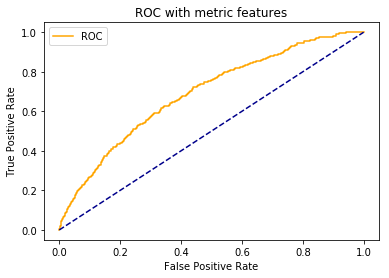

In [406]:
plot_roc_cur(fpr, tpr, title='ROC with metric features')

## Логистическая регрессия без метрических признаков

In [408]:
without_metric_feats = [col for col in df.columns if col not in ["cluster_"+str(x) for x in range(1,6,1)]]

In [409]:
len(without_metric_feats)

76

In [410]:
clf2 = LogisticRegression(random_state=0).fit(X_train[without_metric_feats], y_train)

In [411]:
y_scores = clf2.predict_proba(X_test[without_metric_feats])[:, 1]

In [412]:
print("AUC-ROC", roc_auc_score(y_test, y_scores))
print("Gini", 2*roc_auc_score(y_test, y_scores) - 1)

AUC-ROC 0.689521998403531
Gini 0.379043996807062


In [413]:
fpr2, tpr2, thresholds = metrics.roc_curve(y_test, y_scores, pos_label=None)

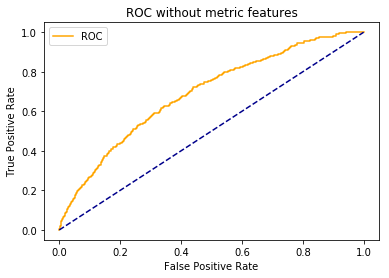

In [414]:
plot_roc_cur(fpr2, tpr2, title='ROC without metric features')

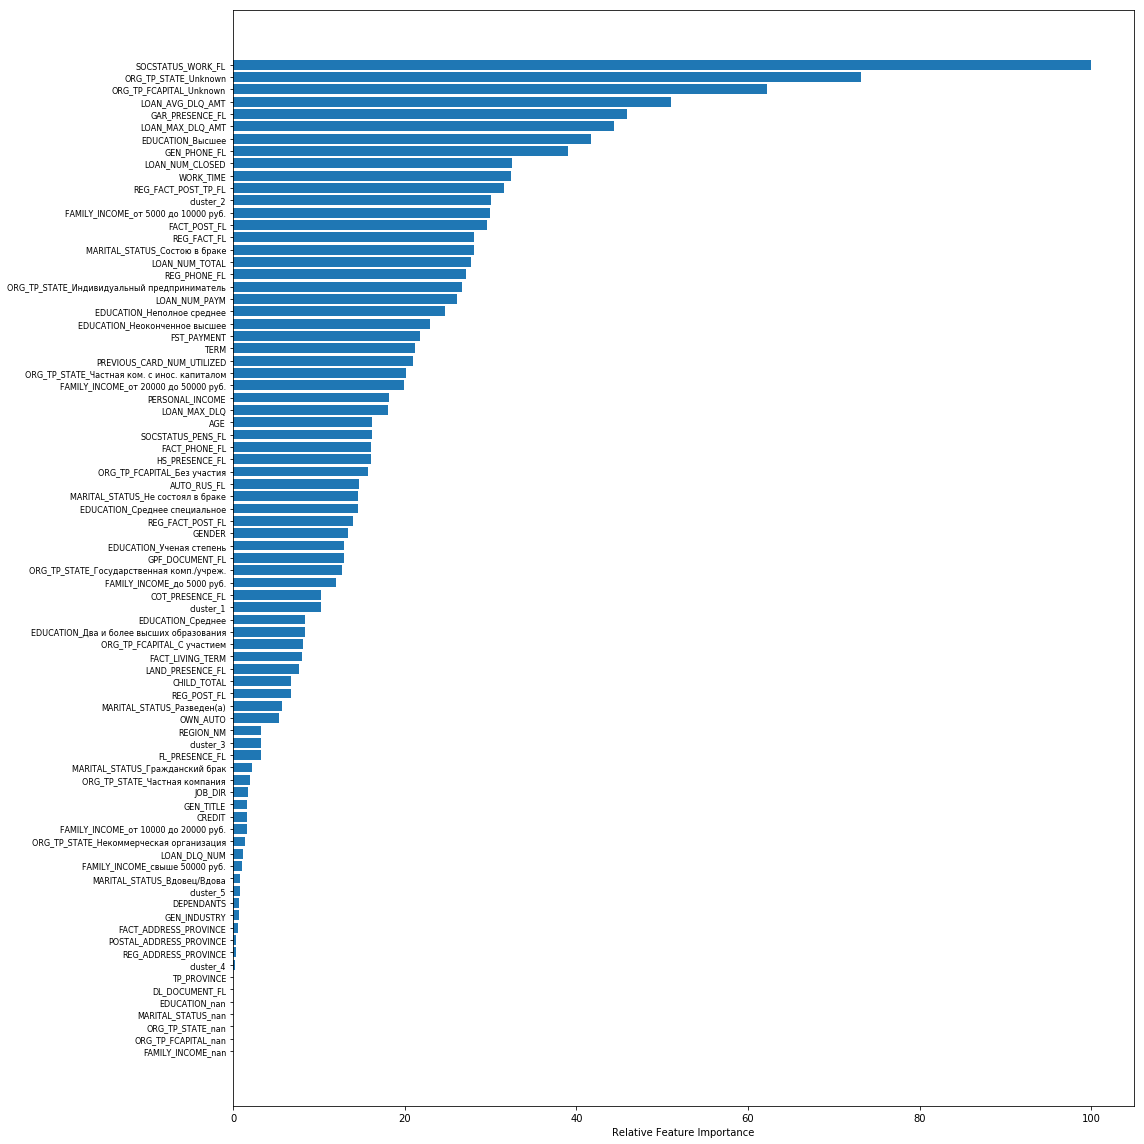

In [428]:
feature_importance = abs(clf.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(16, 16))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_test.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()